<a href="https://colab.research.google.com/github/jmmiddour/DS-Unit-1-Sprint-1-Data-Wrangling-and-Storytelling/blob/master/module4-make-explanatory-visualizations/LS_DS_114_Make_Explanatory_Visualizations_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Lambda School Data Science

*Unit 1, Sprint 1, Module 4*

---

# ASSIGNMENT

### 1) Replicate the lesson code. I recommend that you [do not copy-paste](https://docs.google.com/document/d/1ubOw9B3Hfip27hF2ZFnW3a3z9xAgrUDRReOEo-FHCVs/edit).

Get caught up to where we got our example in class and then try and take things further. How close to "pixel perfect" can you make the lecture graph?

Once you have something that you're proud of, share your graph in the cohort channel and move on to the second exercise.

### 2) Reproduce another example from [FiveThityEight's shared data repository](https://data.fivethirtyeight.com/).

**WARNING**: There are a lot of very custom graphs and tables at the above link. I **highly** recommend not trying to reproduce any that look like a table of values or something really different from the graph types that we are already familiar with. Search through the posts until you find a graph type that you are more or less familiar with: histogram, bar chart, stacked bar chart, line chart, [seaborn relplot](https://seaborn.pydata.org/generated/seaborn.relplot.html), etc. Recreating some of the graphics that 538 uses would be a lot easier in Adobe photoshop/illustrator than with matplotlib. 

- If you put in some time to find a graph that looks "easy" to replicate you'll probably find that it's not as easy as you thought. 

- If you start with a graph that looks hard to replicate you'll probably run up against a brick wall and be disappointed with your afternoon.












## Part 1 - Replicate the lesson code.
Get caught up to where we got our example in class and then try and take things further. How close to "pixel perfect" can you make the lecture graph?

- Stop just before Make Fake Prototypes

Once you have something that you're proud of, share your graph in the cohort channel and move on to the second exercise.



In [1]:
# Import libraries needed for the lesson:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
# Use the 'magic' symbol (%) to specify some non-python code
%matplotlib inline
'''That line is only for jupyter notebooks, and allows plt figures to show up in
   your notebook. If you are using another editor, you'll uses:
    plt.show()
   at the end of all of your plotting commands to have the figure pop up in
   another window.'''

"That line is only for jupyter notebooks, and allows plt figures to show up in\n   your notebook. If you are using another editor, you'll uses:\n    plt.show()\n   at the end of all of your plotting commands to have the figure pop up in\n   another window."

In [3]:
# Specify the 'plot style' we want to use with pandas and matplotlib:
plt.style.available
# 'fast' is the default style, so you don't have to set it.

['Solarize_Light2',
 '_classic_test_patch',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']

In [0]:
# We will use 'fast' tonight:
plt.style.use('fast')

### Pandas built-in tool
This is useful only for simple, quick-and-dirty plots.

For anything more complex you'll want to use a more robust visualization package such as `matplotlib`, `seaborn`, or `plotly`.

It is actually built on top of `matplotlib`.

The oldest library is `matplotlib` for plotting. I actually predates the Pandas library.

`matplotlib` was originally writen for another programming language called "matlab" and then was brought into Python.

`matplotlib` is a little messy and outdated but since everyone still uses it you have to know it as a Data Scientist.

There are 2 plotting libraries that were built on top of `matplotlib`. One is the Python plotting library and the other is `seaborn`.

#### Continuous vs Categorical Variables

In [5]:
# The Titanic dataset is used freqently for machine learning because it is a
#   clean dataset. It has everything you need for preforming different 
#   operations and all the different types of values you need to work with.
# Read in the titanic dataset (this is a scaled down version):
titanic = pd.read_csv('https://raw.githubusercontent.com/austinlasseter/pandas_visualization/master/data/titanic.csv')
titanic.head()

,Survived,Pclass,Sex,Age,Fare,Embarked
0,0,3,male,22.0,7.2500,Southampton
1,1,1,female,38.0,71.2833,Cherbourg
2,1,3,female,26.0,7.9250,Southampton
3,1,1,female,35.0,53.1000,Southampton
4,0,3,male,35.0,8.0500,Southampton


In [6]:
# Cabin class is a categorical variable because it can be displayed using
#   either number or string values.
titanic['Pclass'].value_counts().sort_index()

1    184
2    173
3    355
Name: Pclass, dtype: int64

In [7]:
# Can convert to the values to string categories using .map:
titanic['cabin_class'] = titanic['Pclass'].map({1:'first', 2:'second', 3:'third'})
titanic.sample(7)

,Survived,Pclass,Sex,Age,Fare,Embarked,cabin_class
194,0,3,male,22.0,7.125,Southampton,third
105,0,2,male,25.0,13.000,Southampton,second
705,0,2,male,28.0,10.500,Southampton,second
416,0,3,male,40.5,7.750,Queenstown,third
315,1,3,female,24.0,16.700,Southampton,third
604,0,3,male,34.0,8.050,Southampton,third
539,0,3,male,14.0,46.900,Southampton,third


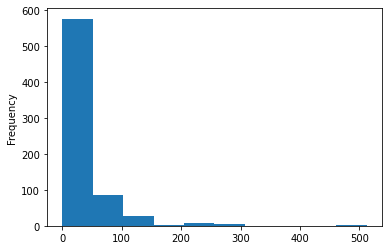

In [8]:
# Fare is a continuous variable, so we can display it with a histogram:
titanic['Fare'].plot(kind='hist');

In [9]:
# Remove the 2 extreme outliers to make it look cleaner and more useful:
print (titanic.shape)
titanic = titanic[titanic['Fare'] < 500]
print (titanic.shape)

(712, 7)
(709, 7)


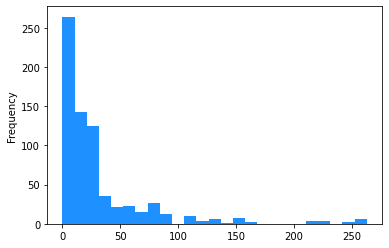

In [10]:
# Histogram will display better now:
titanic['Fare'].plot(kind='hist', color='dodgerblue', bins=25);

# The bins = the number of boxes to diplay in the graph. Default is 10.

In [11]:
# Describe your continuous variable to find out the appropriate values to pass
#   into your bin below:
titanic['Fare'].describe()

count    709.000000
mean      32.545692
std       42.931277
min        0.000000
25%        8.050000
50%       15.500000
75%       32.320800
max      263.000000
Name: Fare, dtype: float64

In [12]:
# A Continuous varaiable can be converted to a categorical variable using binning.
# The bins give you a group of the range of values that you specify in the 
#   variable you are cutting.
# You can also assign a variable to the new groups but you could just put them
#   in the cut code instead.
farelabels = ['low', 'medium', 'high', 'vhigh']
titanic['fare_groups'] = pd.cut(titanic['Fare'], bins=[0, 8, 15,32, 264],
                                labels=farelabels)
titanic[['Fare', 'fare_groups']].head()
# In this example the bins=[0, 8, 15,32, 264] mean you will get the amount a
#   person paid for a ticket in 4 different groups:
# Group 1 ('low') is those who paid $0 - $8
# Group 2 ('medium') is those who paid $8 - $15
# Group 3 ('high') is those who paid $15 - $32
# Group 4 ('vhigh') is those who paid $32 - $264

,Fare,fare_groups
0,7.2500,low
1,71.2833,vhigh
2,7.9250,low
3,53.1000,vhigh
4,8.0500,medium


In [13]:
# Check out the results:
fare_results = titanic['fare_groups'].value_counts().sort_index()
fare_results

low       154
medium    189
high      181
vhigh     178
Name: fare_groups, dtype: int64

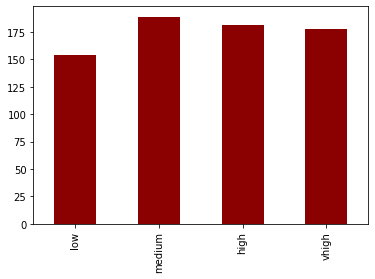

In [14]:
# A line chart is the default for .plot.
# Sometimes it's important to specify the range of your y-axis to get a more 
#   accurate result. 'lim' = 'limits':
fare_results.plot(kind='bar', color='darkred');

#### Display a Single Continuous Varable

In [15]:
# Describe the values in the 'Age' variable:
titanic.describe()

,Survived,Pclass,Age,Fare
count,709.000000,709.000000,709.000000,709.000000
mean,0.401975,2.245416,29.618011,32.545692
std,0.490643,0.834714,14.518828,42.931277
min,0.000000,1.000000,0.420000,0.000000
25%,0.000000,1.000000,20.000000,8.050000
50%,0.000000,3.000000,28.000000,15.500000
75%,1.000000,3.000000,38.000000,32.320800
max,1.000000,3.000000,80.000000,263.000000


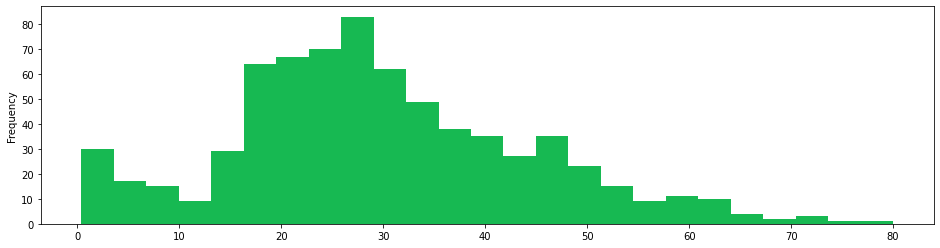

In [16]:
# Histogram:
titanic['Age'].plot(kind='hist',
                    bins=25,
                    figsize=(16, 4),
                    color='#17B952');

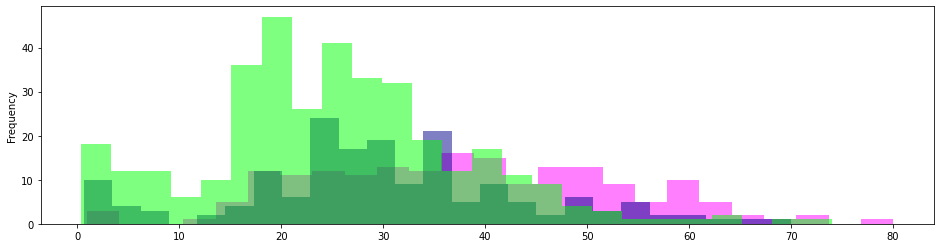

In [17]:
# Stacked Histogram of a continuous variable, broken out by categorical variable:
titanic[titanic['Pclass']==1]['Age'].plot(kind='hist', bins=25, figsize=(16,4),
                                          color='magenta', alpha=0.5)
titanic[titanic['Pclass']==2]['Age'].plot(kind='hist', bins=25, figsize=(16,4),
                                          color='darkblue', alpha=0.5)
titanic[titanic['Pclass']==3]['Age'].plot(kind='hist', bins=25, figsize=(16,4),
                                          color='lime', alpha=0.5);
# alpha= gives you the amount of transparency from 0 - 1.

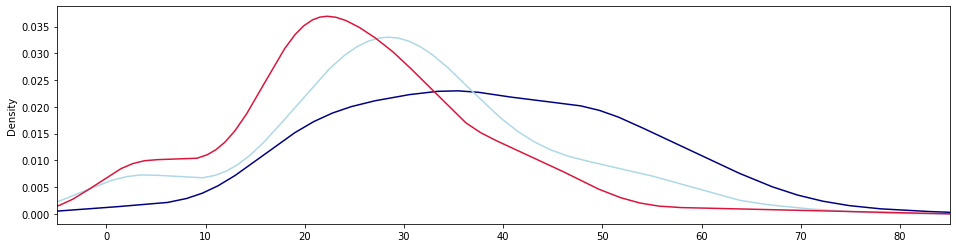

In [18]:
# This is actually easier to read using a Kernel Density Estimate (KDE).
# Note the use of 'xlim'. It is how you set your ticks on the x axis:
titanic[titanic['Pclass']==1]['Age'].plot(kind='density', figsize=(16,4), 
                                          color='navy', xlim=(-5, 85))
titanic[titanic['Pclass']==2]['Age'].plot(kind='density', figsize=(16,4),
                                          color='lightblue', xlim=(-5, 85))
titanic[titanic['Pclass']==3]['Age'].plot(kind='density', figsize=(16,4), 
                                          color='crimson', xlim=(-5, 85));

#### Display a Single Categorical Variable

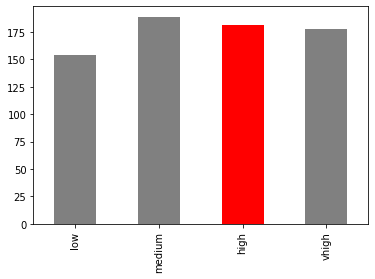

In [19]:
# Bar chart using colors to make a particular value 'pop'!
titanic['fare_groups'].value_counts().sort_index().plot(kind='bar', 
                                                        color=['gray', 'gray', 
                                                               'red', 'gray']);

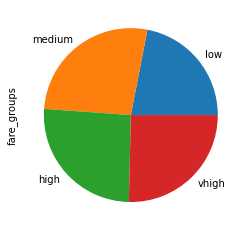

In [20]:
# Pie chart:
titanic['fare_groups'].value_counts().sort_index().plot(kind='pie', 
                                                        figsize=(4, 4));

#### Compare 2 Categorical Variables

In [21]:
# Compare 2 catergorical variables using crosstab:
cab_death = pd.crosstab(titanic['cabin_class'], titanic['Survived'])
cab_death

Survived,0,1
cabin_class,,
first,64,117
second,90,83
third,270,85


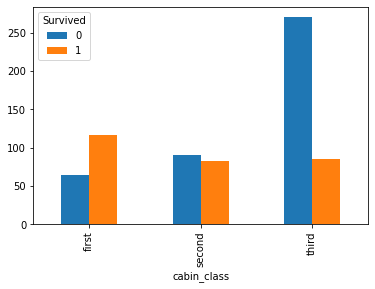

In [22]:
# Make that into a bar chart:
cab_death.plot(kind='bar');

In [23]:
# Crosstab with column percents:
cab_death1 = pd.crosstab(titanic['cabin_class'], titanic['Survived'], 
                         normalize='columns')
cab_death1

Survived,0,1
cabin_class,,
first,0.150943,0.410526
second,0.212264,0.291228
third,0.636792,0.298246


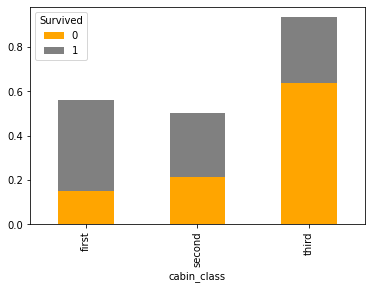

In [24]:
# Stacked bar charts are good for % or propotional data.
# Make a stacked bar chart for easy comparison of 2 categorical variables:
cab_death1.plot(kind='bar', stacked=True, color=['orange', 'gray']);

In [25]:
# Crosstab with column percents using normalize:
cab_death2 = pd.crosstab(titanic['cabin_class'], titanic['Survived'],
                         normalize='index')
cab_death2

Survived,0,1
cabin_class,,
first,0.353591,0.646409
second,0.520231,0.479769
third,0.760563,0.239437


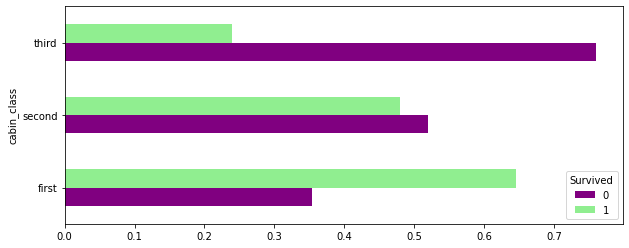

In [26]:
# A paired bar chart for comparison of 2 categorical variables:
# Note the use of 'barh'. It is how to create a horizontal bar chart.
cab_death2.plot(kind='barh', color=['purple', 'lightgreen'], figsize=(10, 4));

#### Compare a Categorical and Continuous Variable

In [27]:
# Let's look at a single continuous variable:
titanic['Age'].describe()  # Shows all the descriptive data for the variable
titanic['Age'].mean()      # If you want just the mean.
titanic['Age'].median()    # If you want just the median.
titanic['Age'].std()       # If you want just the Standard Deviation.
titanic['Age'].describe()

count    709.000000
mean      29.618011
std       14.518828
min        0.420000
25%       20.000000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [28]:
# If you did "titanic.groupby('cabin_class').mean()" you would get the mean of
#   all the columns based on 'cabin_class' values. By adding ['Age'] you get
#   only the average (mean) ages by the values in 'cabin_class'.
# .mean is the aggregator.
# Now explore that continuous variable broken out by a categorical variable:
cab_age = titanic.groupby('cabin_class')['Age'].mean()
cab_age

cabin_class
first     38.151492
second    29.877630
third     25.140620
Name: Age, dtype: float64

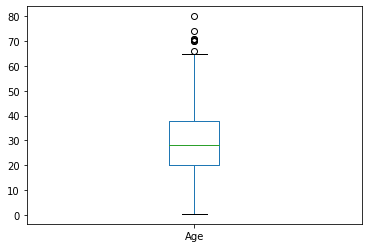

In [29]:
# To visualize a single continuous variable, you can just use`.plot` with 
#   kind='box':
titanic['Age'].plot(kind='box');
# The top dots are the outliers, each dot is an individual case,
# The top line is 1.5 x the 75th %,
# Top of the box is the 75th percentile,
# The green line in the middle of the box is the median,
# The bottom line of the box is the 25th percentile,
# The bottom line is the 1.5 x the 25th %.

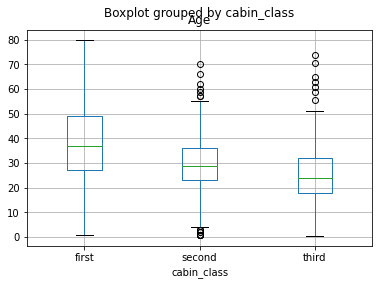

In [30]:
# But to break out a continuous variable by a categorical variable, use 'boxplot`:
plt.style.use('fast')
titanic.boxplot(column='Age', by='cabin_class');

#### Compare 2 or 3 Continuous Variables

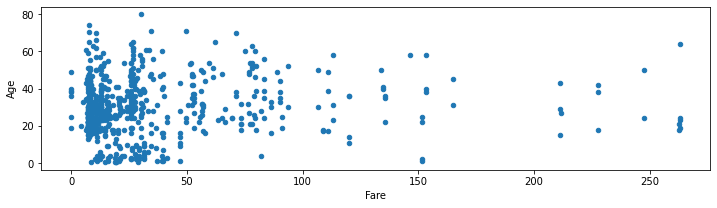

In [31]:
# Two continuous variables: age by fare, using a scatter plot:
titanic.plot(kind='scatter', x='Fare', y='Age', figsize=(12,3));

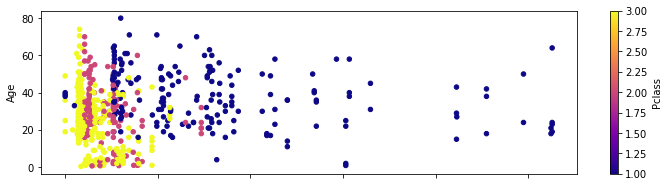

In [32]:
# Three variables: age, fare, and cabin class (color can be either continuous 
#   or categorical here):
plt.style.use('fast')
titanic.plot(kind='scatter', x='Fare', y='Age', c='Pclass', colormap='plasma',
             figsize=(12,3));

#### Line Plot - 2 Continuous Variables
Usse a line plot to examine 2 continuous variables (often time)

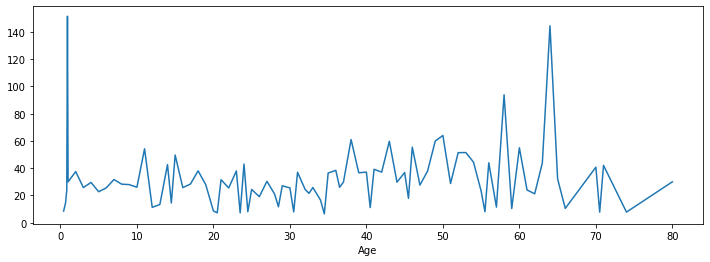

In [33]:
# Line chart: age by fare:
titanic.groupby('Age')['Fare'].mean().plot(kind='line', figsize=(12,4));

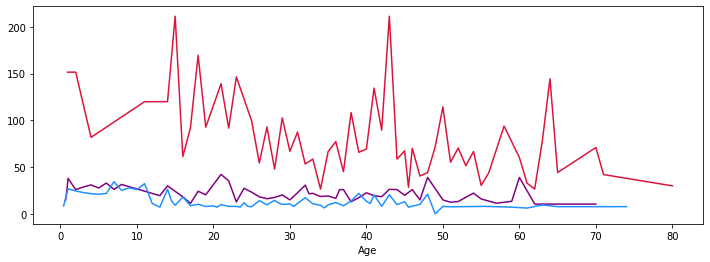

In [34]:
# Line chart: age by fare and cabin class:
# Create a variable for the colors we will use.
mycolors=['crimson', 'purple', 'dodgerblue']

# Rather than specifying 3 plots (as we did above, the the histogram) you can 
#   just loop through the values:
# Being that the color variable is a list, the index values are 0, 1, 2 so you
#   have to specify x-1 to get the correct colors because in the for loop it 
#   states [1, 2, 3].
for x in [1, 2, 3]:
  titanic[titanic['Pclass']==x].groupby('Age')['Fare'].mean().plot(figsize=(12,4),
                                                                  color=mycolors[x-1]);

#### Compare Multiple Continuous Variables

In [35]:
# Correlation Matrix (a pandas method):
# This shows the correlation between variables from -1 - 1.
# If it is - there is a negative correlation.
# If it is + there is a positive correlation.
titanic.corr()

,Survived,Pclass,Age,Fare
Survived,1.000000,-0.351579,-0.084756,0.272376
Pclass,-0.351579,1.000000,-0.365259,-0.616062
Age,-0.084756,-0.365259,1.000000,0.096573
Fare,0.272376,-0.616062,0.096573,1.000000


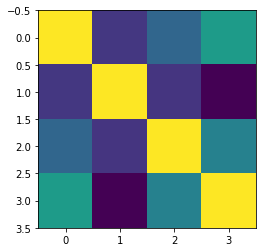

In [36]:
# Display the correlation matrix as a heatmap:
plt.imshow(titanic.corr());

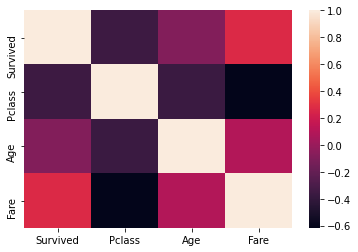

In [37]:
# Use seaborn to make a heatmap:
sns.heatmap(titanic.corr());

### Intro to `matplotlib`


In [38]:
# This is the data we will be plotting:
x =np.linspace(0, 5, 11)
y = x**2
x, y

(array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. ]),
 array([ 0.  ,  0.25,  1.  ,  2.25,  4.  ,  6.25,  9.  , 12.25, 16.  ,
        20.25, 25.  ]))

#### Basic `matplotlib`

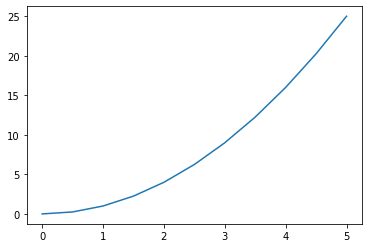

In [39]:
# This is a very simple plot to get started with:
# Notice that no Pandas is required here!
plt.plot(x, y);

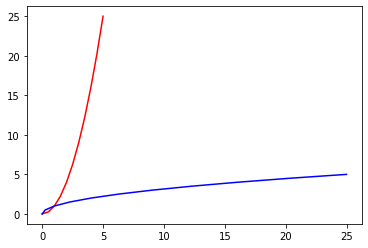

In [40]:
# You can have 2 'plt' plots together:
# Going to add some color too.
plt.plot(x, y, 'r')
plt.plot(y, x, 'b');

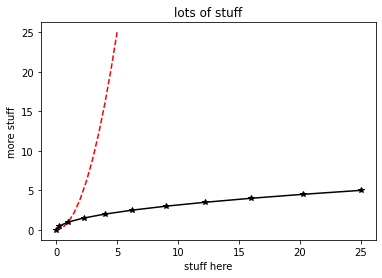

In [41]:
# Now add some labels plus a little texture:
# 'r--' = color=red & -- for the line type.
# 'k*-' = color=black & *- for the line type.
plt.plot(x, y, 'r--')
plt.plot(y, x, 'k*-')
plt.xlabel('stuff here')
plt.ylabel('more stuff')
plt.title('lots of stuff');

#### Multiplots on Same Canvas

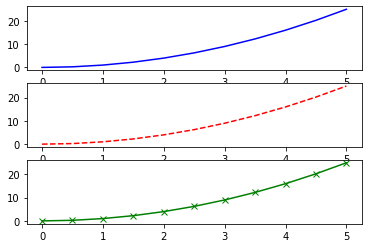

In [42]:
# The basic syntax goes like this: 
# plt.subplot(nrows (# of rows), ncols (# of columns), plt_number)
plt.subplot(3, 1, 1)
plt.plot(x, y, 'b')
plt.subplot(3, 1, 2)
plt.plot(x, y, 'r--')
plt.subplot(3, 1, 3)
plt.plot(x, y, 'g-x');

#### The `.figure()` method
Have to first create a figure instance (empty canvas).

Then can add axes to that figure.

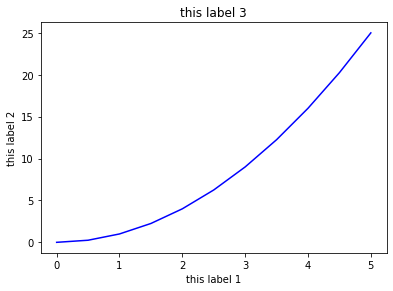

In [43]:
# Create the figure class (empty canvas):
fig = plt.figure()

# Add set of axes to the figure:
# Can name this anything but it is generally called ax for axes.
ax = fig.add_axes([0.1,    # Left
                   0.1,    # Bottom     }-- Range is 0 to 1
                   0.8,    # Width
                   0.8])   # Height

# Plot on that set of axes:
ax.plot(x, y, 'b')
ax.set_xlabel('this label 1')
ax.set_ylabel('this label 2')
ax.set_title('this label 3');

# Notice the use of the set_ to begin methods.
# This code is a little more complicated, but the advantage is that we now have
#   full control of where the plot axes are placed, and we can easily add more
#   than one axes to the figure.

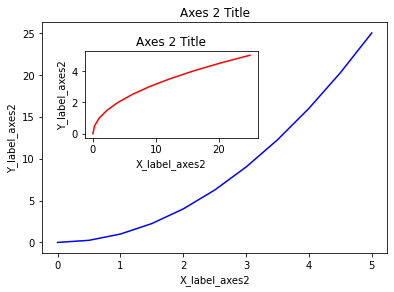

In [44]:
# Creates blank canvas:
fig2 = plt.figure()

# Create your axes:
# The sizes passed in are different for each axes because one will be smaller.
axes1 = fig2.add_axes([0.1, 0.1, 0.8, 0.8]) # main axes
axes2 = fig2.add_axes([0.2, 0.5, 0.4, 0.3]) # inset axes

# Larger Figure Axes 1:
axes1.plot(x, y, 'b')
axes1.set_xlabel('X_label_axes2')
axes1.set_ylabel('Y_label_axes2')
axes1.set_title('Axes 2 Title')

# Insert Figure Axes 2:
axes2.plot(y, x, 'r')
axes2.set_xlabel('X_label_axes2')
axes2.set_ylabel('Y_label_axes2')
axes2.set_title('Axes 2 Title');

#### The `subplots()` Method

`plt.subplots()` is a function that returns a tuple containing a figure and axes object(s).

When using `fig, ax = pplt.subplots()` you unpack this tuple into the variables fig and ax. 

Having fig is useful if you want to change figure-level attributes or save the figure as an image to use later.

All axes objects (the objects that have plotting methods) have a parent figure object anyway.

```
# This is more concise then the one below:
fig, ax = plt.subplots()
```
```
# This one is not as concise as the one above but does the same thing:
fig = plt.figure()
ax = fig.add_subplot(111)
```

https://stackoverflow.com/questions/34162443/why-do-many-examples-use-fig-ax-plt-subplots-in-matplotlib-pyplot-python




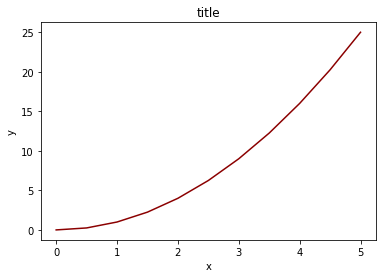

In [45]:
# Used similar to plt.figure() except uses tuple unpacking to grab fig and axes.
fig, axes = plt.subplots(nrows=1, ncols=1) 
# The default is `(1, 1)` so you don't actually have to specify this.

# Now use the axes object to add stuff to plot:
axes.plot(x, y, 'darkred')
axes.set_xlabel('x')
axes.set_ylabel('y')
axes.set_title('title');

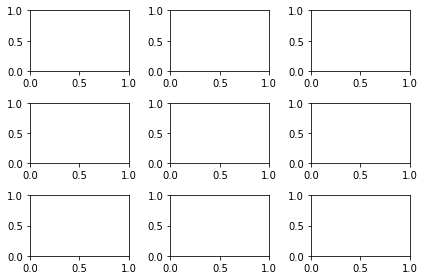

In [46]:
# Then you can specify the number of rows and columns when creating the
#   subplots() object.
# Empty canvas of 1 by 2 subplots
fig, axes = plt.subplots(nrows=3, ncols=3) 
# the parameter labels `nrows` and `ncols` are optional.

# Call the figure:
fig    

# Use to group them tightly together:
plt.tight_layout() 
# more about `.tight_layout()` below.

In [47]:
# If you were to call the axes by itself it would return a numpy array.
axes

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fefda8ec5f8>,
      dtype=object)

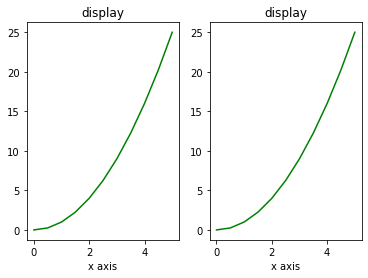

In [48]:
# Because axes is an array you can use a for loop to display all of them.
fig, axes = plt.subplots(nrows=1, ncols=2)

# Display the figure object 
for ax in axes:
    ax.plot(x, y, 'g')
    ax.set_xlabel('x axis')
    ax.set_title('display')   
plt;

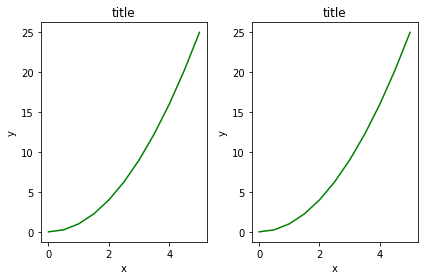

In [49]:
# tight_layout keeps your figures from overlaping too much:
fig, axes = plt.subplots(nrows=1, ncols=2)

for ax in axes:
    ax.plot(x, y, 'g')
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_title('title')

fig    
plt.tight_layout()

### Imitate a Real-World Example

In [50]:
# Today we will reproduce this example from FiveThirtyEight:
from IPython.display import display, Image

url = 'https://fivethirtyeight.com/wp-content/uploads/2017/09/mehtahickey-inconvenient-0830-1.png'
example = Image(url=url, width=400)

display(example)

This comes from a github repository:
https://github.com/fivethirtyeight/data/tree/master/inconvenient-sequel

Which then leads us to a blog post about movie ratings.

Going to try to get as close as posible to the example.

#### Make Fake Prototypes

## Part 2 - Reproduce another [FiveThityEight's repository](https://data.fivethirtyeight.com/)
**WARNING:** There are a lot of very custom graphs and tables at the above link. I highly recommend not trying to reproduce any that look like a table of values or something really different from the graph types that we are already familiar with. Search through the posts until you find a graph type that you are more or less familiar with: histogram, bar chart, stacked bar chart, line chart, [seaborn relplot](https://seaborn.pydata.org/generated/seaborn.relplot.html), etc. Recreating some of the graphics that 538 uses would be a lot easier in Adobe photoshop/illustrator than with matplotlib.

If you put in some time to find a graph that looks "easy" to replicate you'll probably find that it's not as easy as you thought.

If you start with a graph that looks hard to replicate you'll probably run up against a brick wall and be disappointed with your afternoon.

### My Source:
I am going to try to recreate the bar chart in the 

[When Does Praying In Public Make Others Uncomfortable?](https://fivethirtyeight.com/features/when-does-praying-in-public-make-others-uncomfortable/)


In [51]:
# Need to import library to display my image:
from IPython.display import display, Image

# Add a picture of the chart I am going to recreate:
rel_chart = Image(url='https://fivethirtyeight.com/wp-content/uploads/2016/09/libresco-publicprayer-21.png?w=575',
                  width=600)

# View my example:
display(rel_chart)

In [0]:
# Read in the csv file:
rel = pd.read_csv('https://raw.githubusercontent.com/fivethirtyeight/data/master/religion-survey/religion-survey-results.csv')

In [53]:
# View a sample of the data to make sure it all lines up:
print (rel.shape)
rel.sample(3)

(1040, 48)


,"What is your present religion, if any?",Unnamed: 1,Do you consider yourself to be an evangelical?,Do you attend religious services,"How often do you: Pray in public with visible motions (sign of the cross, bowing, prostration, shokeling, etc)","How often do you: Pray in public using some kind of physical object (rosary, tefillin, etc)",How often do you: Pray aloud before meals in the presence of people who don't belong to your religion,How often do you: Tell someone you'll pray for him or her,How often do you: Ask or offer to pray with someone,"How often do you: Bring up your religion, unprompted, in conversation","How often do you: Ask others about their religion, unprompted, in conversation","How often do you: Decline some kind of food or beverage for religious reasons (kosher, halal, fasting rules, etc)","How often do you: Wear religious clothing/jewelry (hijab, kippah, wig, kara, turban, cross, etc)","How often do you: Participate in a public religious event on the streets (Corpus Christi procession, inauguration of Torah scrolls, etc)","How comfortable do you feel when you: Pray in public with visible motions (sign of the cross, bowing, prostration, shokeling, etc)","How comfortable do you feel when you: Pray in public using some kind of physical object (rosary, tefillin, etc)",How comfortable do you feel when you: Pray aloud before meals in the presence of people who don't belong to your religion,How comfortable do you feel when you: Tell someone you'll pray for him or her,How comfortable do you feel when you: Ask or offer to pray with someone,"How comfortable do you feel when you: Bring up your religion, unprompted, in conversation","How comfortable do you feel when you: Ask others about their religion, unprompted, in conversation","How comfortable do you feel when you: Decline some kind of food or beverage for religious reasons (kosher, halal, fasting rules, etc)","How comfortable do you feel when you: Wear religious clothing/jewelry (hijab, kippah, wig, kara, turban, cross, etc)","How comfortable do you feel when you: Participate in a public religious event on the streets (Corpus Christi procession, inauguration of Torah scrolls, etc)","How comfortable do you think someone outside your religion would be if they saw you: Pray in public with visible motions (sign of the cross, bowing, prostration, shokeling, etc)","How comfortable do you think someone outside your religion would be if they saw you: Pray in public using some kind of physical object (rosary, tefillin, etc)",How comfortable do you think someone outside your religion would be if they saw you: Pray aloud before meals in the presence of people who don't belong to your religion,How comfortable do you think someone outside your religion would be if they saw you: Tell someone you'll pray for him or her,How comfortable do you think someone outside your religion would be if they saw you: Ask or offer to pray with someone,"How comfortable do you think someone outside your religion would be if they saw you: Bring up your religion, unprompted, in conversation","How comfortable do you think someone outside your religion would be if they saw you: Ask others about their religion, unprompted, in conversation","How comfortable do you think someone outside your religion would be if they saw you: Decline some kind of food or beverage for religious reasons (kosher, halal, fasting rules, etc)","How comfortable do you think someone outside your religion would be if they saw you: Wear religious clothing/jewelry (hijab, kippah, wig, kara, turban, cross, etc)","How comfortable do you think someone outside your religion would be if they saw you: Participate in a public religious event on the streets (Corpus Christi procession, inauguration of Torah scrolls, etc)","How comfortable would you be seeing someone who practices a different religion from you: Pray in public with visible motions (sign of the cross, bowing, prostration, shokeling, etc)","How comfortable would you be seein

In [70]:
# Display all the columns so I know which ones I need:
pd.set_option('display.max_columns', 50)
print (rel.columns)

Index(['What is your present religion, if any?', 'Unnamed: 1',
       'Do you consider yourself to be an evangelical?',
       'Do you attend religious services',
       'How often do you: Pray in public with visible motions (sign of the cross, bowing, prostration, shokeling, etc)',
       'How often do you: Pray in public using some kind of physical object (rosary, tefillin, etc)',
       'How often do you: Pray aloud before meals in the presence of people who don't belong to your religion',
       'How often do you: Tell someone you'll pray for him or her',
       'How often do you: Ask or offer to pray with someone',
       'How often do you: Bring up your religion, unprompted, in conversation',
       'How often do you: Ask others about their religion, unprompted, in conversation',
       'How often do you: Decline some kind of food or beverage for religious reasons (kosher, halal, fasting rules, etc)',
       'How often do you: Wear religious clothing/jewelry (hijab, kippah, wig, 

#### Cleaning my Data

In [71]:
# Create a new dataset with only the columns I need:
together = rel[['What is your present religion, if any?',
                'How comfortable do you feel when you: Ask or offer to pray with someone',
                'How comfortable do you feel when you: Participate in a public religious event on the streets (Corpus Christi procession, inauguration of Torah scrolls, etc)',
                'Unnamed: 1']]

# Check my work:
together.head()

,"What is your present religion, if any?",How comfortable do you feel when you: Ask or offer to pray with someone,"How comfortable do you feel when you: Participate in a public religious event on the streets (Corpus Christi procession, inauguration of Torah scrolls, etc)",Unnamed: 1
0,Response,Response,Response,None of these
1,None of these,I don't do this,Very comfortable,Wesleyan Christian
2,Atheist,NaN,NaN,NaN
3,Protestant,Extremely comfortable,Extremely comfortable,NaN
4,Muslim,Somewhat comfortably,Extremely comfortable,NaN


In [72]:
# Rename the column names to make the dataset more readable and easier to use:
christ = together.rename(columns={'What is your present religion, if any?':'Religion',
                                  'How comfortable do you feel when you: Ask or offer to pray with someone':'Pray with Others',
                                  'How comfortable do you feel when you: Participate in a public religious event on the streets (Corpus Christi procession, inauguration of Torah scrolls, etc)':'Public Event',
                                  'Unnamed: 1':'Religion1'},
                           index=None)

# Check my work:
christ.head()

,Religion,Pray with Others,Public Event,Religion1
0,Response,Response,Response,None of these
1,None of these,I don't do this,Very comfortable,Wesleyan Christian
2,Atheist,NaN,NaN,NaN
3,Protestant,Extremely comfortable,Extremely comfortable,NaN
4,Muslim,Somewhat comfortably,Extremely comfortable,NaN


In [73]:
# Look for any missing values:
print (christ['Religion'].isnull().value_counts())
print (christ['Pray with Others'].isnull().value_counts())
print (christ['Public Event'].isnull().value_counts())
print (christ['Religion1'].isnull().value_counts())

# I have missing data in Pray with Others, Public Events, and Religion1.

False    1040
Name: Religion, dtype: int64
False    914
True     126
Name: Pray with Others, dtype: int64
False    926
True     114
Name: Public Event, dtype: int64
True     797
False    243
Name: Religion1, dtype: int64


In [74]:
# Combine the Religion and Religion1 columns to a new column:
# christ1 = christ['Religion1'].
christ['Religion_2'] = christ['Religion'].fillna('')+'_'+christ['Religion1'].fillna('')
christ.head(8)

,Religion,Pray with Others,Public Event,Religion1,Religion_2
0,Response,Response,Response,None of these,Response_None of these
1,None of these,I don't do this,Very comfortable,Wesleyan Christian,None of these_Wesleyan Christian
2,Atheist,NaN,NaN,NaN,Atheist_
3,Protestant,Extremely comfortable,Extremely comfortable,NaN,Protestant_
4,Muslim,Somewhat comfortably,Extremely comfortable,NaN,Muslim_
5,None of these,Very comfortable,I don't do this,Working on Christianity. Orthodox seemed too c...,None of these_Working on Christianity. Orthodo...
6,None of these,I don't do this,I don't do this,Episcopalian,None of these_Episcopalian
7,None of these,I don't do this,I don't do this,the multiverse,None of these_the multiverse


In [75]:
christ['Religion_2'].value_counts()

Protestant_                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      234
Roman Catholic_                                                                                                                                                                                                                                                    

In [0]:
# # Drop the Nan values:
# christ['Pray with Others'].dropna(inplace=True)
# christ['Public Event'].dropna(inplace=True)
# christ['Religion1'].dropna(inplace=True)

# # Check to see if it worked
# print (christ['Pray with Others'].isnull().sum())
# print (christ['Public Event'].isnull().sum())
# print (christ['Religion1'].isnull().sum())

0
0
0


In [63]:
# Check the size of my dataset:
christ.shape

(1040, 5)

In [0]:
# Create a function to clean up the new Religion column:
def clean_r(rel):
  if rel.__contains__('None of these_'):
  # str('None of these_') in rel=True:
    return rel.replace('None of these_', '').title()
  else:
    return rel

In [84]:
# Test my function:
print (clean_r('None of these_Spiritualist'))
print (clean_r('None of these_catholic'))
print (clean_r('None of these_ Nondenominational'))
print (clean_r('None of these_Amish'))
print (clean_r('None of these_A higher power'))

Spiritualist
Catholic
 Nondenominational
Amish
A Higher Power


In [0]:
# Need to filter out only the "Christians" as stated on the example:
christ = (together['What is your present religion, if any?'] == 'Protestant') | (together['What is your present religion, if any?'] == 'Roman Catholic') | (together['Unnamed: 1'] == 'Roman Catholic')
christ

0       False
1       False
2       False
3        True
4       False
        ...  
1035     True
1036    False
1037    False
1038     True
1039    False
Length: 1040, dtype: bool

In [0]:
# Need to turn the filter into a new dataframe:
christ2 = together[christ]
print(christ2.shape)
christ2.sample(10)

(426, 4)


,"What is your present religion, if any?",How comfortable do you feel when you: Ask or offer to pray with someone,"How comfortable do you feel when you: Participate in a public religious event on the streets (Corpus Christi procession, inauguration of Torah scrolls, etc)",Unnamed: 1
683,Protestant,I don't do this,I don't do this,NaN
137,Protestant,Extremely comfortable,I don't do this,NaN
395,Protestant,Somewhat comfortably,I don't do this,NaN
254,Protestant,Extremely comfortable,I don't do this,NaN
209,Roman Catholic,I don't do this,I don't do this,NaN
240,Roman Catholic,Very comfortable,I don't do this,NaN
945,Protestant,I don't do this,I don't do this,NaN
486,Protestant,I don't do this,I don't do this,NaN
854,Protestant,I don't do this,Extremely comfortable,NaN
754,Protestant,Extremely comfortable,I don't do this,NaN


In [0]:
# Check the amount of NaN values in both Religion columns:
print (christ2['Religion1'].isnull().sum())
print (christ2['Religion'].isnull().sum())

426
0


In [0]:
Religion = christ2['Religion'].fillna(christ2['Religion1'])
christ2['Religion'] = Religion
christ2.head()

,Religion,Pray with Others,Public Event,Religion1
3,Protestant,Extremely comfortable,Extremely comfortable,NaN
8,Protestant,Not so comfortable,I don't do this,NaN
10,Protestant,Somewhat comfortably,Somewhat comfortably,NaN
12,Roman Catholic,I don't do this,I don't do this,NaN
15,Protestant,Somewhat comfortably,I don't do this,NaN


In [0]:
christ2['Religion1'].describe()

count       0
unique      0
top       NaN
freq      NaN
Name: Religion1, dtype: object

In [0]:
together['How comfortable do you feel when you: Ask or offer to pray with someone'].value_counts()

I don't do this           418
Extremely comfortable     153
Very comfortable          149
Somewhat comfortably      110
Not so comfortable         58
Not at all comfortable     25
Response                    1
Name: How comfortable do you feel when you: Ask or offer to pray with someone, dtype: int64

In [0]:
together['How comfortable do you feel when you: Participate in a public religious event on the streets (Corpus Christi procession, inauguration of Torah scrolls, etc)'].value_counts()

I don't do this           668
Extremely comfortable      87
Very comfortable           84
Somewhat comfortably       50
Not so comfortable         21
Not at all comfortable     15
Response                    1
Name: How comfortable do you feel when you: Participate in a public religious event on the streets (Corpus Christi procession, inauguration of Torah scrolls, etc), dtype: int64

# STRETCH OPTIONS

### 1) Reproduce one of the following using the matplotlib or seaborn libraries:

- [thanksgiving-2015](https://fivethirtyeight.com/features/heres-what-your-part-of-america-eats-on-thanksgiving/) 
- [candy-power-ranking](https://fivethirtyeight.com/features/the-ultimate-halloween-candy-power-ranking/) 
- or another example of your choice!

### 2) Make more charts!

Choose a chart you want to make, from [Visual Vocabulary - Vega Edition](http://ft.com/vocabulary).

Find the chart in an example gallery of a Python data visualization library:
- [Seaborn](http://seaborn.pydata.org/examples/index.html)
- [Altair](https://altair-viz.github.io/gallery/index.html)
- [Matplotlib](https://matplotlib.org/gallery.html)
- [Pandas](https://pandas.pydata.org/pandas-docs/stable/visualization.html)

Reproduce the chart. [Optionally, try the "Ben Franklin Method."](https://docs.google.com/document/d/1ubOw9B3Hfip27hF2ZFnW3a3z9xAgrUDRReOEo-FHCVs/edit) If you want, experiment and make changes.

Take notes. Consider sharing your work with your cohort!

In [0]:
# More Work Here